# Project: Investigating Patients Appointments Data
*- By Maithili Desai*

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dataset">Dataset Overview</a></li>
<li><a href="#quest">Questions addressed</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#draw">Drawing Conclusions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, a dataset consisting information from 100k medical appointments in public hospitals at Vitoria, Brazil is investigated. The reason why the patient did not show up to their appointment attracts my attention. This dataset contains records whether patients miss appointments, attributes of paients and information about apointments. In this project, I have formulated set of questions which will help identify factors that are vital to be known in order to predict if a patient will
show up for their scheduled appointment.

<a id='dataset'></a>
## Dataset overview
- The dataset is also available on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).
- There are 14 attributes and 110527 observations of patient data
- The most important attribute is the no_show which mentions whether the patient attended the appointment or not
- ### Feature Description
>1. PatientId: Identification of a patient
>2. AppointmentID: Identification of each appointment
>3. Gender: Male or Female
>4. Scheduled Day: The day of the actual appointment.
>5. Appointment Day: The day someone called or registered the appointment
>6. Age: How old is the patient
>7. Neighbourhood: The location of the appointment takes place
>8. Scholarship: whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
>9. Hyertension: Type of disease
>10. Diabetes: Type of disease
>11. Alcoholism: Type of disease
>12. Handicap: Disability
>13. SMS received: or more messages sent to the patient.
>14. no-show: Whether the person will show up at the appointment or not

<a id='quest'></a>
## Questions addressed in this project:
> 1. Does sending a SMS reminder increase the attendance of the patient? Is it affected by Gender?
> 2. Is there a correlation between type of disease and attendance of patient for the appointment?
> 3. Which age group has secured most scholarships and does it affect the attendance at appointment?

In [86]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I'll first load the dataset to assess the general properties and then clean the dataset to perform further analysis.

### General Properties

In [87]:
# Load the dataset into a dataframe
df = pd.read_csv('appointments_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [88]:
# Number of samples in the dataframe
df.shape

(110527, 14)

This states that there are 110527 Patient information across 14 characteristics

In [89]:
# Number of Missing values in the dataframe
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

This dataset has no missing values which is good

In [90]:
# Datatypes of the columns in the dataframe
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Some of the data types can be changed
- PatientID can be converted from float to string
- Scheduled Day can be converted from string to date type object
- Appointment Day can be converted from string to date type object

## Data Cleaning

This step can be performed in three steps:
1. Convert datatypes
     - Datatypes of 3 columns changed
2. Remove extraneous columns
     - Two columns removed
3. Rename Columns
     - Utilized lambda function to convert column names to lowercase and remove spaces if any

### 1. Change Datatypes
- PatientID can be converted from float to string
- Scheduled Day can be converted from string to date type object
- Appointment Day can be converted from string to date type object

In [91]:
# Correcting Datatype of Patient ID
df['PatientId'] = df['PatientId'].astype(np.int64)

# Check for success
df['PatientId'].dtype

dtype('int64')

In [92]:
# Correcting Datatype of Scheduled Day
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Check for success
df['ScheduledDay'].dtype

datetime64[ns, UTC]

In [93]:
# Correcting Datatype of Appointment Day
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Check for success
df['AppointmentDay'].dtype

datetime64[ns, UTC]

In [94]:
# Checking the datatypes 
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

## 2. Drop extraneous columns
Dropping features that aren't relevant to our questions. Pandas' drop function is used.

Columns to Drop:
1. PatientId
2. AppointmentId

In [95]:
# Dropping columns in the dataframe
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

# Check for success
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 3. Renaming Columns

This steps makes working with the columns easier.

- Converting all column names to lowercase
- Changing spaces to underscore

In [96]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**The lambda function is used here to convert all columns to lowercase and remove the spaces between them if any.**

<a id='eda'></a>
# Exploratory Data Analysis

In this section, I have computed summary statistics and created visualizations with the goal of addressing the research questions that were posed in the Introduction section.

In [97]:
# Summary Statistics
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We notice that the minimum value for Age is -1. But age cannot be negative. Checking how many negative values are there.

In [98]:
df.query('age < 0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


So only one row is present with negative age

In [99]:
# Find the index of the row with negative Age value
ind = df.query('age < 0').index

# Drop the row with that index
df.drop(ind, inplace=True)

In [100]:
# Check Summary statistics again for success
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The row with negative Age value has been dropped

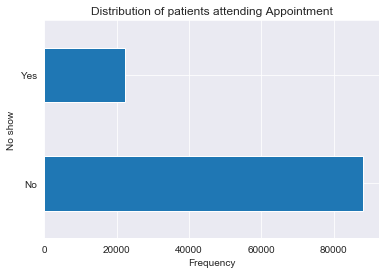

In [101]:
# Distribution of patients attending Appointment
ax = df['no-show'].value_counts().plot(kind='barh')
ax.set(xlabel='Frequency', ylabel='No show', title='Distribution of patients attending Appointment');

More number of people show up to the appointment. Out of the 110526 Patients, 88207 show up for their appointment and 22319 don't

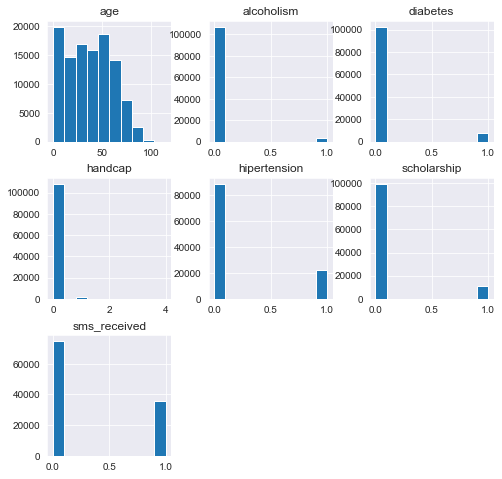

In [102]:
# Histogram to visualise the distribution of numerical variables
df.hist(figsize=(8,8));

These distributions show that:
- Very few patients experience Alcholism, Diabetes or are Handicapped.
- A substantial number of patients (more than 20,000) have Hypertension.
- More number of people have not received a SMS of reminder and only around 40,000 have received a SMS reminder

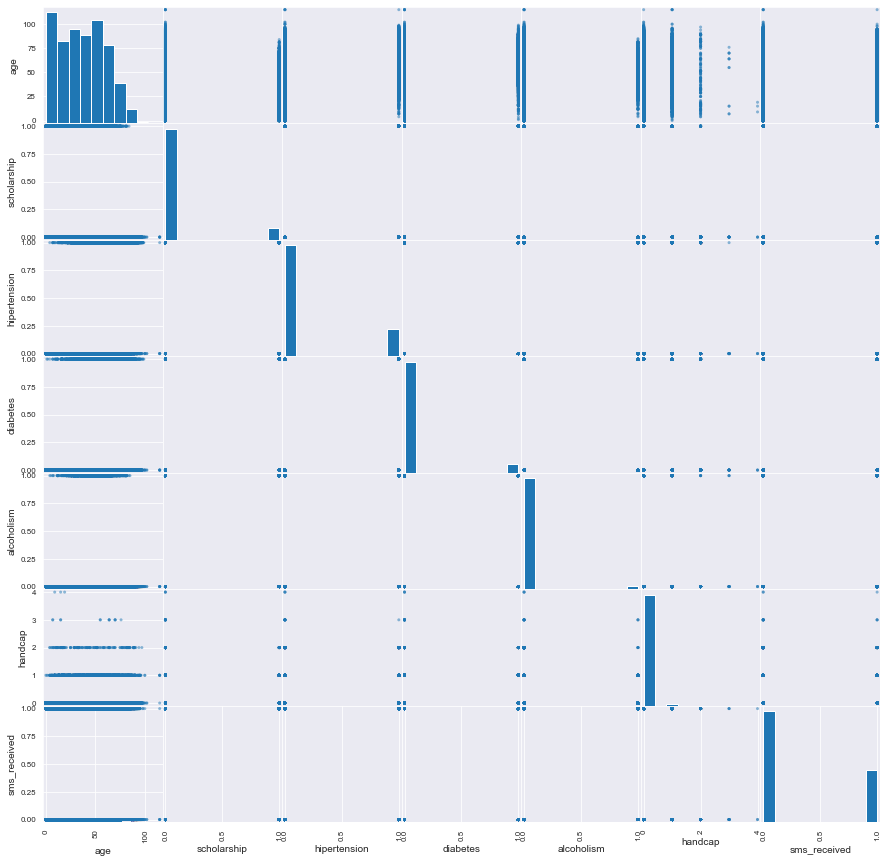

In [103]:
# Scatter Plot
pd.plotting.scatter_matrix(df,figsize=(15,15));

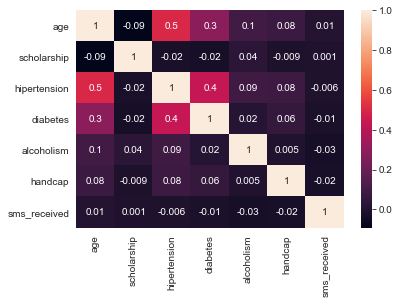

In [104]:
sns.heatmap(df.corr(), annot = True, fmt='.1g');

This plot shows that there is a strong correlation between age, diabetes and hypertension.

<a id='draw'></a>
# Drawing Conclusions
- In this section, we will answer the questions formulated.

## Does sending a SMS reminder increase the attendance of the patient? Is it affected by Gender?

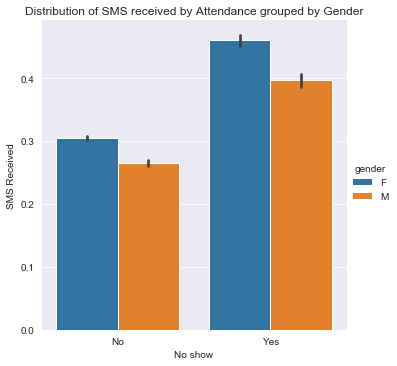

In [105]:
# Bar plot
sns.catplot(x="no-show", y="sms_received", hue="gender", kind="bar", data=df);
plt.title('Distribution of SMS received by Attendance grouped by Gender');
plt.xlabel('No show')
plt.ylabel('SMS Received');

Thus we can observe that:
- More females than males have received sms reminders and attended the meetings. This could be due to the bigger sample size for females than males. 
- The group that received sms reminders did not attend the appointment. Thus a suggestion can be made to discontinue this service to save cost of operation. This may seem counter intuitive, but we do not have information on the conditions of when the SMS is sent. For example, they may target no-showers with SMS, or they may send the SMS once the patient has not checked-in 30 mintues prior to their appointment, etc

In [106]:
# Check for sample size of each gender
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

Thus, there are indeed more female patient oberservations compared to male

## Is there a correlation between type of disease and attendance of patient for the appointment?
- This can be checked by seeing the distribution of diseases for patients who attended and were not able to attend

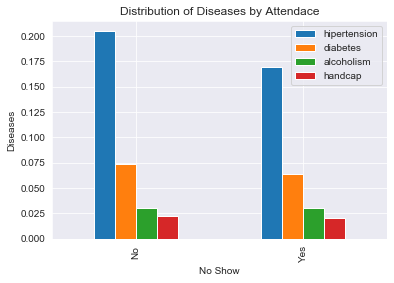

In [107]:
# Grouping by Diseases to check attendance at appointment
df.groupby('no-show').mean()[['hipertension','diabetes','alcoholism','handcap']].plot(kind='bar');
plt.title('Distribution of Diseases by Attendace')
plt.xlabel('No Show')
plt.ylabel('Diseases');

The distribution of diseases between patients attending and not attending are the same. There are overall more number of hypertension patients and number of handicapped people is the least.

## Which age group has secured most scholarships and does it affect the attendance at appointment?

In [108]:
# Get mean of age for participation in scholarship and attendance
noshow_mean = df.groupby(['no-show','scholarship']).mean().age
noshow_mean

no-show  scholarship
No       0              38.497010
         1              30.973319
Yes      0              34.950864
         1              29.468968
Name: age, dtype: float64

In [109]:
# Proportion of patients attending the appointment
no_proportions = noshow_mean['No']
no_proportions

scholarship
0    38.497010
1    30.973319
Name: age, dtype: float64

In [110]:
# Proportion of patients not attending the appointment
yes_proportions = noshow_mean['Yes']
yes_proportions

scholarship
0    34.950864
1    29.468968
Name: age, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each attendance group and width of each bar.

In [111]:
ind = np.arange(len(no_proportions))
width = 0.35

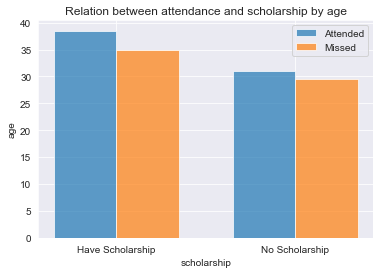

In [112]:
# plot bars
no_bars = plt.bar(ind, no_proportions, width, alpha=.7, label='Attended');
yes_bars = plt.bar(ind + width, yes_proportions, width, alpha=.7, label='Missed');

# title and labels
plt.ylabel('age')
plt.xlabel('scholarship')
plt.title('Relation between attendance and scholarship by age')
locations = ind + width / 2  # xtick locations
labels = ['Have Scholarship','No Scholarship']  # xtick labels
plt.xticks(locations, labels)


# legend
plt.legend();

Thus patients of the age 35 and above are more likely to have scholarship and also more likely to attend the appointment.

<a id='conclusions'></a>
## Conclusions

**Results**: Our data suggests that
>1. Does sending a SMS reminder increase the attendance of the patient? Is it affected by Gender?
   - Receiving SMS reminders does not increase patient attendance and thus a suggestion can be made to discontinue this service to save cost of operation
>2. Is there a correlation between type of disease and attendance of patient for the appointment?
   - The type of disease does not increase patient attendance and more number of patients experience Hypertension
>3. Which age group has secured most scholarships and does it affect the attendance at appointment? 
   - Having a scholarship increases the chances of a patient attending the appointment which is people with the age 35 and above



**Limitations**: There are couple of limitations with our data
>1. Most of our variables are categorical, which does not allow for a high level of statistic methods to be incorporated to provide correlations, etc
>2. The statistics used here are descriptive, not inferential, meaning that we did not create any hypotheses or controlled experiments or inferences with our data
>3. We do not have a lot of details for certain factors to draw conclusions. For the sms_received, the data shows that no-showers are more likely to receive a SMS. This may seem counter intuitive, but we do not have information on the conditions of when the SMS is sent. For example, they may target no-showers with SMS, or they may send the SMS once the patient has not checked-in 30 mintues prior to their appointment, etc 
